<a href="https://colab.research.google.com/github/sahil301290/AIMLWorkshop2022/blob/main/02_Building_AlexNet_for_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Details of GPU
!nvidia-smi

Fri Feb 25 01:54:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Import tensorflow and checking the versions
import tensorflow as tf
print(tf.__version__)
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.8.0


In [3]:
#Getting the dataset
!unzip 'Fruits.zip'

Archive:  Fruits.zip
   creating: Fruits/
   creating: Fruits/Apple/
  inflating: Fruits/Apple/0_100.jpg  
  inflating: Fruits/Apple/100_100.jpg  
  inflating: Fruits/Apple/101_100.jpg  
  inflating: Fruits/Apple/102_100.jpg  
  inflating: Fruits/Apple/103_100.jpg  
  inflating: Fruits/Apple/104_100.jpg  
  inflating: Fruits/Apple/105_100.jpg  
  inflating: Fruits/Apple/106_100.jpg  
  inflating: Fruits/Apple/107_100.jpg  
  inflating: Fruits/Apple/108_100.jpg  
  inflating: Fruits/Apple/109_100.jpg  
  inflating: Fruits/Apple/10_100.jpg  
  inflating: Fruits/Apple/110_100.jpg  
  inflating: Fruits/Apple/111_100.jpg  
  inflating: Fruits/Apple/112_100.jpg  
  inflating: Fruits/Apple/113_100.jpg  
  inflating: Fruits/Apple/114_100.jpg  
  inflating: Fruits/Apple/115_100.jpg  
  inflating: Fruits/Apple/116_100.jpg  
  inflating: Fruits/Apple/117_100.jpg  
  inflating: Fruits/Apple/118_100.jpg  
  inflating: Fruits/Apple/119_100.jpg  
  inflating: Fruits/Apple/11_100.jpg  
  inflating: Fr

In [4]:
import os 
Apple = os.path.join('../content/Fruits/Apple')
Banana = os.path.join('../content/Fruits/Banana')

In [5]:
print('Total Apple Images:',len(os.listdir(Apple)))
print('Total Banana Images:',len(os.listdir(Banana)))

Total Apple Images: 492
Total Banana Images: 490


In [6]:
from glob import glob
import os.path
from shutil import copy2

path = '../content/Fruits'
test = '../content/Test'
train = '../content/Train'

if not os.path.exists(test):
	os.makedirs(test)
if not os.path.exists(train):
	os.makedirs(train)

In [7]:
for folder in glob(path+'/*'):
		#print(folder)
		# find number of images in folder
		no_images_in_folder = len(os.listdir(folder))
		# make new folder inside test and train
		folder_test = test+'/'+folder.split('/')[3]+'/'
		folder_train = train+'/'+folder.split('/')[3]+'/'
		# print(folder_test)
		# print(folder_train)
		if not os.path.exists(folder_test):
			os.makedirs(folder_test)
		if not os.path.exists(folder_train):
			os.makedirs(folder_train)

		print("no of images in this folder: {}".format(no_images_in_folder))
		train_num = int(no_images_in_folder*0.8)
		
		# iterate from 0..test and copy to test
		# iterate test to end and copy to train
		for idx, im in enumerate(glob(folder+'/*')):
			#print(im)
			if idx <= train_num:
			# copy to test
				copy2(im, folder_train)
			else:
			# copy to train
				copy2(im, folder_test)

no of images in this folder: 492
no of images in this folder: 490


In [8]:
Apple_files = os.listdir(Apple)
print(Apple_files[:10])
Banana_files = os.listdir(Banana)
print(Banana_files[:10])

['r_168_100.jpg', '320_100.jpg', '108_100.jpg', '102_100.jpg', '120_100.jpg', 'r_25_100.jpg', '187_100.jpg', '174_100.jpg', '144_100.jpg', '124_100.jpg']
['r_168_100.jpg', '51_100.jpg', '62_100.jpg', '120_100.jpg', '187_100.jpg', '174_100.jpg', '144_100.jpg', 'r_53_100.jpg', '65_100.jpg', '124_100.jpg']


In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [10]:
# Directory with our training Apple pictures
train_apple_dir = os.path.join('../content/Train/Apple')

# Directory with our training Banana pictures
train_banana_dir = os.path.join('../content/Train/Banana')

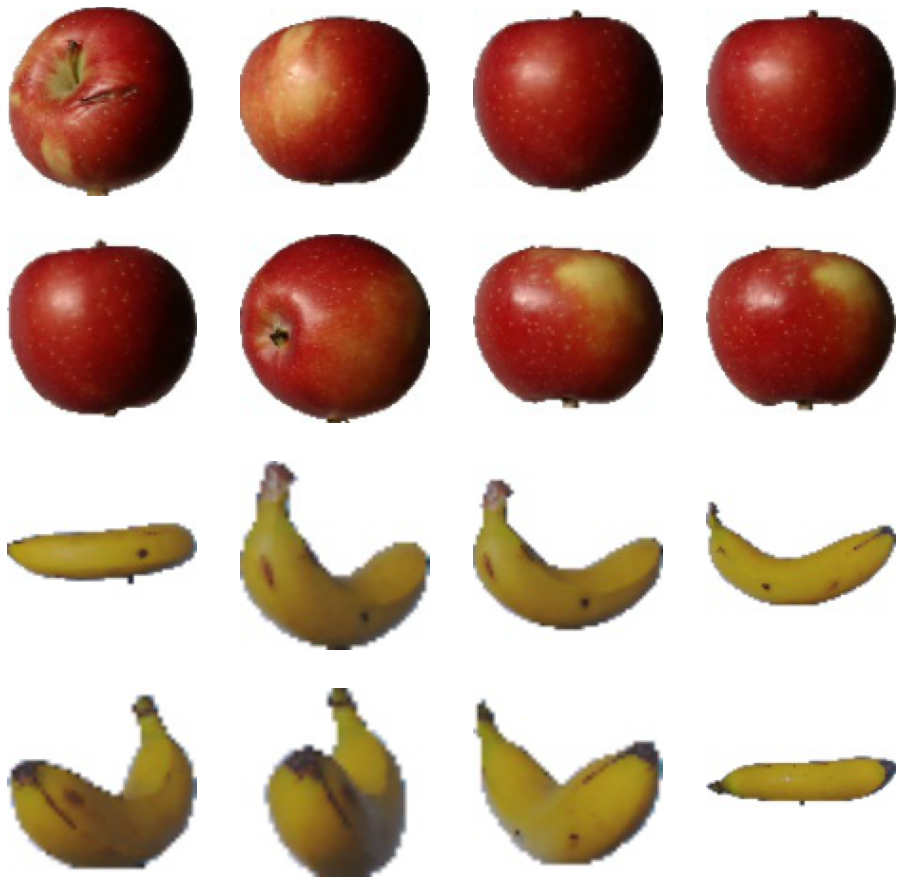

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_apple_pix = [os.path.join(train_apple_dir, fname) 
                for fname in Apple_files[pic_index-8:pic_index]]
next_banana_pix = [os.path.join(train_banana_dir, fname) 
                for fname in Banana_files[pic_index-8:pic_index]]

for i, img_path in enumerate(next_apple_pix+next_banana_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [12]:
print(len(os.listdir('../content/Train/Apple/')))
print(len(os.listdir('../content/Train/Banana/')))
print(len(os.listdir('../content/Test/Apple/')))
print(len(os.listdir('../content/Test/Banana/')))

394
393
98
97


In [13]:
TRAINING_DIR = "../content/Train"
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size = 10,
    class_mode = 'binary',
    target_size = (227,227)
)

VALIDATION_DIR = "../content/Test"
validation_datagen = ImageDataGenerator(rescale = 1/255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size = 10,
    class_mode = 'binary',
    target_size = (227,227)
)

Found 787 images belonging to 2 classes.
Found 195 images belonging to 2 classes.


In [14]:
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D

In [15]:
#Defining the alexNet model
alexNet = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(96,(11,11),activation = 'relu',strides = 4,input_shape=(227,227,3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((3,3),strides = 2),

  tf.keras.layers.Conv2D(256,(5,5),activation = 'relu',padding = 'same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((3,3),strides = 2),

  tf.keras.layers.Conv2D(384,(3,3),activation = 'relu',padding = 'same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(384,(3,3),activation = 'relu',padding = 'same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256,(3,3),activation = 'relu',padding = 'same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((3,3),strides = 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])
alexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [16]:
#Compiling the alexNet
alexNet.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [17]:
history = alexNet.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
79/79 [==============================] - 24s 178ms/step - loss: 0.6261 - acc: 0.9606 - val_loss: 0.0839 - val_acc: 1.0000
Epoch 2/10
79/79 [==============================] - 12s 151ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 8.9022e-04 - val_acc: 1.0000
Epoch 3/10
79/79 [==============================] - 12s 151ms/step - loss: 3.3331e-04 - acc: 1.0000 - val_loss: 4.1303e-05 - val_acc: 1.0000
Epoch 4/10
79/79 [==============================] - 12s 154ms/step - loss: 6.0706e-04 - acc: 1.0000 - val_loss: 1.6036e-05 - val_acc: 1.0000
Epoch 5/10
79/79 [==============================] - 13s 158ms/step - loss: 0.0177 - acc: 0.9975 - val_loss: 1.9409e-06 - val_acc: 1.0000
Epoch 6/10
79/79 [==============================] - 12s 154ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 9.8118e-07 - val_acc: 1.0000
Epoch 7/10
79/79 [==============================] - 12s 149ms/step - loss: 0.1995 - acc: 0.9720 - val_loss: 3.3073e-07 - val_acc: 1.0000
Epoch 8/10
79/79 [===================

In [18]:
history.history??

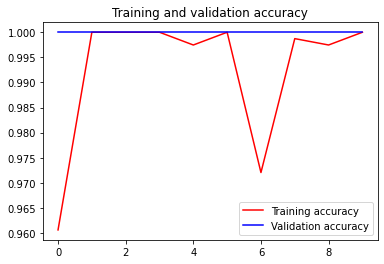

<Figure size 432x288 with 0 Axes>

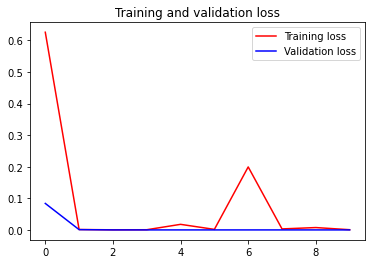

<Figure size 432x288 with 0 Axes>

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()